# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[23 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

from sklearn.decomposition import PCA


import torch
import torch.nn as nn
import torch.optim as optim





In [2]:
df = pd.read_csv('creditcard.csv')
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [16]:
count_class_0 = len(df[df['Class'] == 0])
count_class_1 = len(df[df['Class'] == 1])

print(f"'Class' = 0: {count_class_0}")
print(f"'Class' = 1: {count_class_1}")

'Class' = 0: 284315
'Class' = 1: 492


In [6]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in non_numeric_columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [15]:
iso_forest = IsolationForest(contamination='auto', random_state=42)

iso_forest.fit(X_train)

y_pred_iso = iso_forest.predict(X_test)

y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

n_anomalies_in_test_data = np.sum(y_pred_iso)

print("Number of annomalies in test data is - ", n_anomalies_in_test_data)

print("Isolation Forest:")
print(classification_report(y_test, y_pred_iso))



Number of annomalies in test data is -  3097
Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.76      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.86      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [7]:
one_class_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
one_class_svm.fit(X_train)
y_pred_svm = one_class_svm.predict(X_test)



y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

n_anomalies_in_test_data = np.sum(y_pred_svm)



print("Number of annomalies in test data is - ", n_anomalies_in_test_data)



Number of annomalies in test data is -  4301


In [8]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.84      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.90      0.52     85443
weighted avg       1.00      0.95      0.97     85443



In [10]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

y_pred_lof = lof.fit_predict(X_test)

y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

n_anomalies_in_test_data = np.sum(y_pred_lof)

print("Number of annomalies in test data is - ", n_anomalies_in_test_data)

print("Local Outlier Factor:")
print(classification_report(y_test, y_pred_lof))


Number of annomalies in test data is -  5464
Local Outlier Factor:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.00      0.18      0.01       148

    accuracy                           0.93     85443
   macro avg       0.50      0.56      0.49     85443
weighted avg       1.00      0.93      0.96     85443



In [10]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=14):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(True),
            nn.Linear(64, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(True),
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [11]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)


In [12]:
input_dim = X_train.shape[1]
model = Autoencoder(input_dim=input_dim, encoding_dim=14)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [13]:
num_epochs = 100
batch_size = 64

train_dataset = torch.utils.data.TensorDataset(X_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for data in train_loader:
        img = data[0]
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.4649
Epoch [20/100], Loss: 0.2109
Epoch [30/100], Loss: 5.9975
Epoch [40/100], Loss: 0.5269
Epoch [50/100], Loss: 0.4169
Epoch [60/100], Loss: 0.3938
Epoch [70/100], Loss: 0.2695
Epoch [80/100], Loss: 0.2948
Epoch [90/100], Loss: 5.0519
Epoch [100/100], Loss: 0.4043


In [14]:
model.eval()
with torch.no_grad():
    X_test_pred = model(X_test_tensor)
    loss = nn.MSELoss(reduction='none')(X_test_pred, X_test_tensor)
    loss = loss.mean(dim=1).numpy()

threshold = np.percentile(loss, 99)  

y_pred_ae = (loss > threshold).astype(int)

print("Autoencoder:")
print(classification_report(y_test, y_pred_ae))


Autoencoder:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.10      0.60      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.80      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [16]:
results = pd.DataFrame({
    'Method': ['Isolation Forest', 'One-Class SVM', 'Local Outlier Factor', 'Autoencoder'],
    'Precision': [
        precision_score(y_test, y_pred_iso, zero_division=0),
        precision_score(y_test, y_pred_svm, zero_division=0),
        precision_score(y_test, y_pred_lof, zero_division=0),
        precision_score(y_test, y_pred_ae, zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_iso, zero_division=0),
        recall_score(y_test, y_pred_svm, zero_division=0),
        recall_score(y_test, y_pred_lof, zero_division=0),
        recall_score(y_test, y_pred_ae, zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_iso, zero_division=0),
        f1_score(y_test, y_pred_svm, zero_division=0),
        f1_score(y_test, y_pred_lof, zero_division=0),
        f1_score(y_test, y_pred_ae, zero_division=0)
    ]
})

print(results)


                 Method  Precision    Recall  F1-Score
0      Isolation Forest   0.036487  0.763514  0.069646
1         One-Class SVM   0.029063  0.844595  0.056192
2  Local Outlier Factor   0.004758  0.175676  0.009266
3           Autoencoder   0.104094  0.601351  0.177468


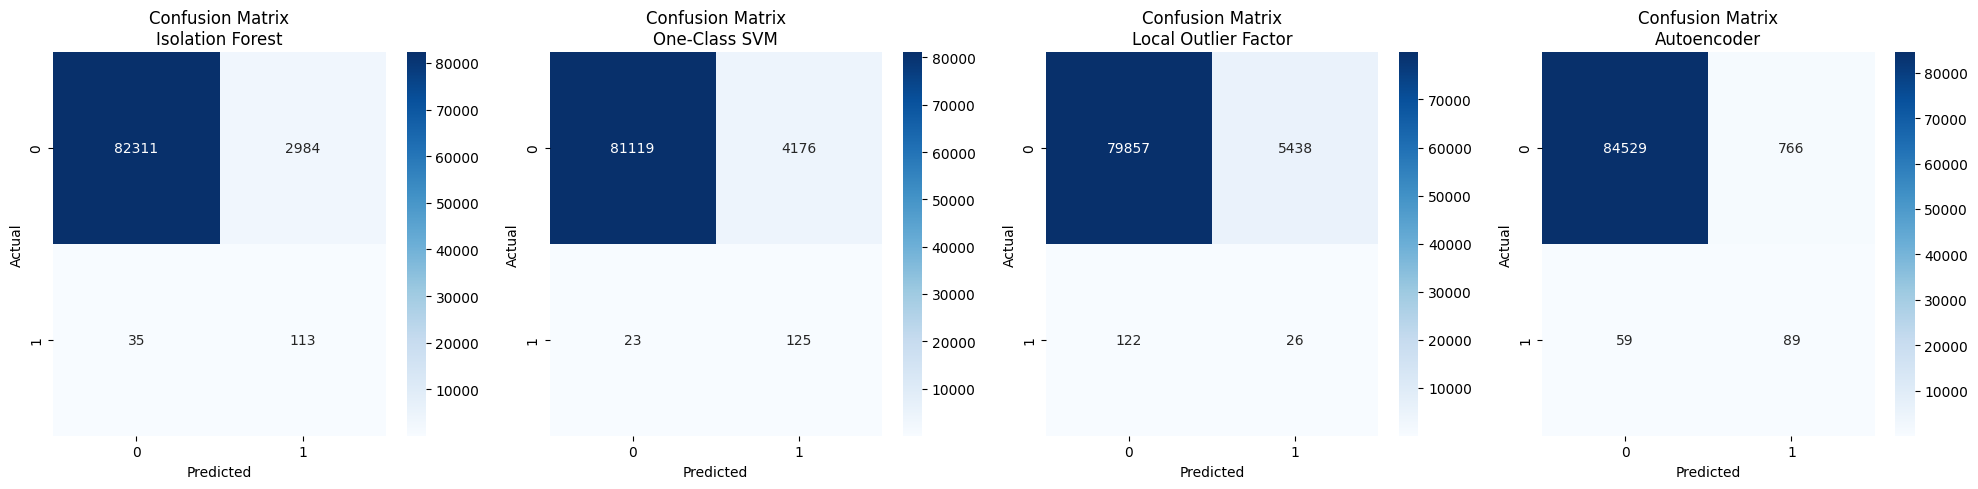

In [17]:
methods = ['Isolation Forest', 'One-Class SVM', 'Local Outlier Factor', 'Autoencoder']
predictions = [y_pred_iso, y_pred_svm, y_pred_lof, y_pred_ae]

plt.figure(figsize=(20, 5))
for i, (method, pred) in enumerate(zip(methods, predictions)):
    cm = confusion_matrix(y_test, pred)
    plt.subplot(1, 4, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix\n{method}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()


***Висновки:***
Хоч загальні результати найвищі в Autoencoder (а саме Precision та F1-Score), проте в нього не найвищий показник Recall (близько 60%). Якщо нам важливий саме показник Recall ми можемо задати нижчу планку для значень похибки відновлень (наприклад 95 а не 99). Нижчу точність мають моделі 'Isolation Forest', 'One-Class SVM', 'Local Outlier Factor' але це тому що я не вказав очікувану кількість аномалій (приблизно 0.1%), якщо вказати цей процент то вони підвищать свої загальні показники але понизять Recall (я це знаю бо я провіряв). Крім того ми не завжди знаєм очікувану кількість аномалій.
Тож у висновку найкраще себе показав Autoencoder далі Isolation Forest та One-Class SVM і найгірше Local Outlier Factor.